In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaning data/cleaned_chicago_food_inspections_V2.csv', dtype={'license_#': str, 'zip': str})
df.isna().sum()


inspection_id          0
dba_name               0
aka_name               0
license_#              0
facility_type          0
risk                   0
address                0
city                   0
state                  0
zip                    0
inspection_date        0
inspection_type        0
results                0
violations         80492
latitude             989
longitude            989
location             989
has_violations         0
dtype: int64

## Which areas in Chicago may need food reform?

In [5]:
#Looking at results distribution
df['results'].value_counts()

results
Pass                    149665
Fail                     56275
Pass w/ Conditions       43681
Out of Business          24189
No Entry                 12282
Not Ready                 3865
Business Not Located        90
Name: count, dtype: int64

In [6]:
#Filtering for most meaningful result types
core_results = df[df['results'].isin(['Pass', 'Fail', 'Pass w/ Conditions'])]
core_results

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,has_violations
0,1170324,CAPTAIN HOOKS FISH & CHICKEN/FIREHOUSE GRILL,CAPTAIN HOOKS FISH & CHICKEN FIREHOUSE GRILL,1804138,Restaurant,Risk 1 (High),5648 W ROOSEVELT,CHICAGO,IL,60644,2012-06-18,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.865679,-87.766331,"(41.86567851033532, -87.76633113301574)",True
1,2614750,CHICK-FIL-A PULLMAN,CHICK-FIL-A PULLMAN,3015728,Restaurant,Risk 1 (High),11131 S CORLISS AVE,CHICAGO,IL,60628,2025-03-31,License,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...,41.691956,-87.600558,"(41.69195600663339, -87.60055824712973)",True
2,2609909,HAPPY MARKET,HAPPY MARKET,2912802,Grocery Store,Risk 2 (Medium),2334 S WENTWORTH AVE,CHICAGO,IL,60616,2025-01-02,Canvass,Pass w/ Conditions,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.849954,-87.632094,"(41.84995400192252, -87.63209419559098)",True
3,2609927,SAT KAIVAL FOOD INC/SUBWAY,SAT KAIVAL FOOD INC/SUBWAY,2728400,Restaurant,Risk 1 (High),1916 S STATE ST,CHICAGO,IL,60616,2025-01-02,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.856053,-87.627311,"(41.85605269621059, -87.62731125804903)",True
4,2615511,MAPLEWOOD BREWING COMPANY,MAPLEWOOD BREWING COMPANY,3016105,Liquor,Risk 3 (Low),2717-2719 N MAPLEWOOD AVE,CHICAGO,IL,60647,2025-04-10,License,Pass,56. ADEQUATE VENTILATION & LIGHTING; DESIGNATE...,41.930957,-87.691376,"(41.93095692249829, -87.69137628601092)",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290041,2610859,MOY LEE,MOY LEE,2877054,Restaurant,Risk 1 (High),5346 N MILWAUKEE AVE,CHICAGO,IL,60630,2025-01-22,Complaint,Pass,NaN,41.977764,-87.769830,"(41.97776393135019, -87.76982985082259)",False
290042,2610937,DAPPER'S EAST RESTAURANT,DAPPER'S EAST RESTAURANT,12540,Restaurant,Risk 1 (High),2901 W ADDISON ST,CHICAGO,IL,60618,2025-01-23,Complaint Re-Inspection,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.946553,-87.700536,"(41.94655282616904, -87.700535765616)",True
290044,2610409,ACE SUSHI @POTASH MARKET,ACE SUSHI,2808766,Restaurant,Risk 1 (High),875 N STATE ST,CHICAGO,IL,60610,2025-01-13,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.898878,-87.628111,"(41.89887819742381, -87.6281111483033)",True
290045,2610823,"Kitchen Chicago, LLC","Kitchen Chicago, LLC",2119905,Shared Kitchen,Risk 1 (High),324 N LEAVITT ST,CHICAGO,IL,60612,2025-01-22,Canvass,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,41.887434,-87.681849,"(41.88743405025222, -87.68184949426895)",True


In [7]:
#Building a pivot table to include total inspections per zip, failures per zip,
#and new calumn called fail_rate = fail% by zip

zip_results = core_results.groupby(['zip', 'results']).size().unstack(fill_value = 0)
zip_results['total'] = zip_results.sum(axis = 1)
zip_results['fail_rate'] = zip_results['Fail']/zip_results['total'] * 100
zip_results.sort_values('fail_rate', ascending = False)

results,Fail,Pass,Pass w/ Conditions,total,fail_rate
zip,,,,,
46319,1,0,0,1,100.0
60482,4,1,0,5,80.0
60501,3,1,1,5,60.0
60585,2,1,1,4,50.0
60018,2,2,0,4,50.0
...,...,...,...,...,...
60423,0,1,0,1,0.0
60411,0,1,1,2,0.0
60406,0,2,0,2,0.0


In [8]:
# Filter for recent inspections
recent = df[df['inspection_date'] >= '2021-01-01']

#Focus on core result types
filtered = recent[recent['results'].isin(['Pass', 'Fail', 'Pass w/ Conditions'])]

#Create a pivot table by zip
zip_results = filtered.groupby(['zip', 'results']).size().unstack(fill_value = 0)

#Add total and fail rate columns
zip_results['total'] = zip_results.sum(axis = 1)
zip_results['fail_rate'] = zip_results['Fail']/zip_results['total'] * 100
zip_results['pass_rate'] = zip_results['Pass'] / zip_results['total'] * 100


#Filter zips with enough inspections
zip_results_filtered = zip_results[zip_results['total']>=20]

zip_results_filtered.sort_values('fail_rate', ascending = False)

results,Fail,Pass,Pass w/ Conditions,total,fail_rate,pass_rate
zip,,,,,,
60827,34,28,7,69,49.275362,40.579710
60617,532,729,175,1436,37.047354,50.766017
60620,449,635,208,1292,34.752322,49.148607
60628,366,587,151,1104,33.152174,53.170290
60633,47,78,19,144,32.638889,54.166667
60636,233,393,106,732,31.830601,53.688525
60624,191,338,94,623,30.658106,54.253612
60651,255,440,154,849,30.035336,51.825677
60625,563,977,347,1887,29.835718,51.775305


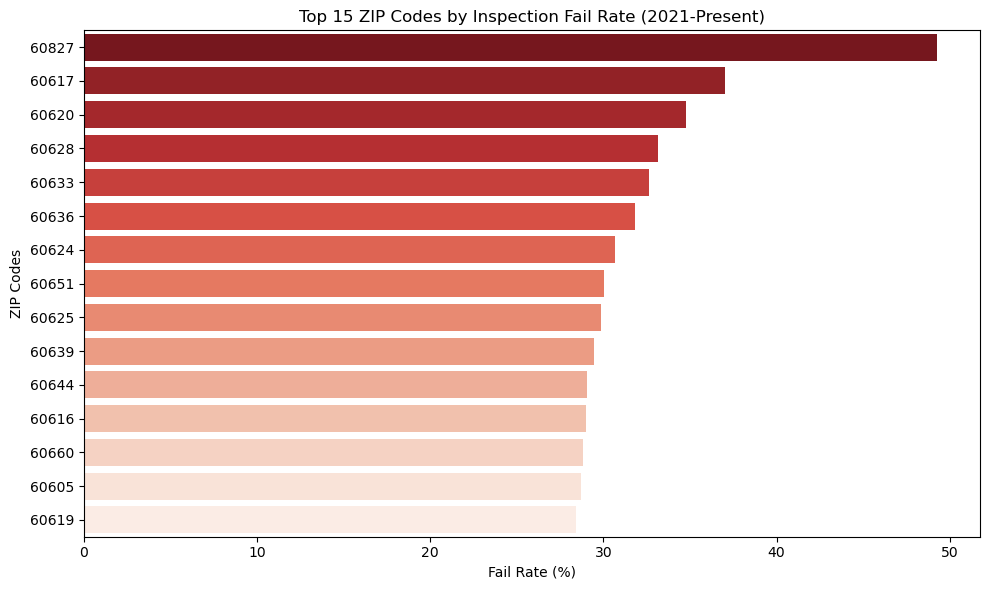

In [9]:
#Setting up bar chart for top 15 zip codes with highest fail rate
top_failing = zip_results_filtered.sort_values('fail_rate', ascending = False).head(15)

plt.figure(figsize = (10,6))
sns.barplot(data = top_failing,
            x = 'fail_rate',
            y = 'zip',
            hue = 'zip',
            palette = 'Reds_r',
            dodge = False,
            legend = False
           )
plt.title('Top 15 ZIP Codes by Inspection Fail Rate (2021-Present)')
plt.xlabel('Fail Rate (%)')
plt.ylabel('ZIP Codes')
plt.tight_layout()
plt.show()


## EDA Summary
**Date Range**: 2021-Present
**Minimum Inspections per ZIP**: 20
## Top 15 ZIP codes by fail rate
- 60827, 60617, 60620, and 60628 had the highest inspection fail rates in the city.
- Failure rates in these areas exceeded 30-50% indicating potential need for food and saftey reform and oversight
### Notes
- Only inspections from **January 1, 2021 onward** were included to focus on post-COVID operations and recent inspection trends.
- Results limited to 'Pass', 'Fail', and 'Pass w/ Conditions' for clean comparisons
- Zip codes with less than 20 inspections were excluded to reduce noise



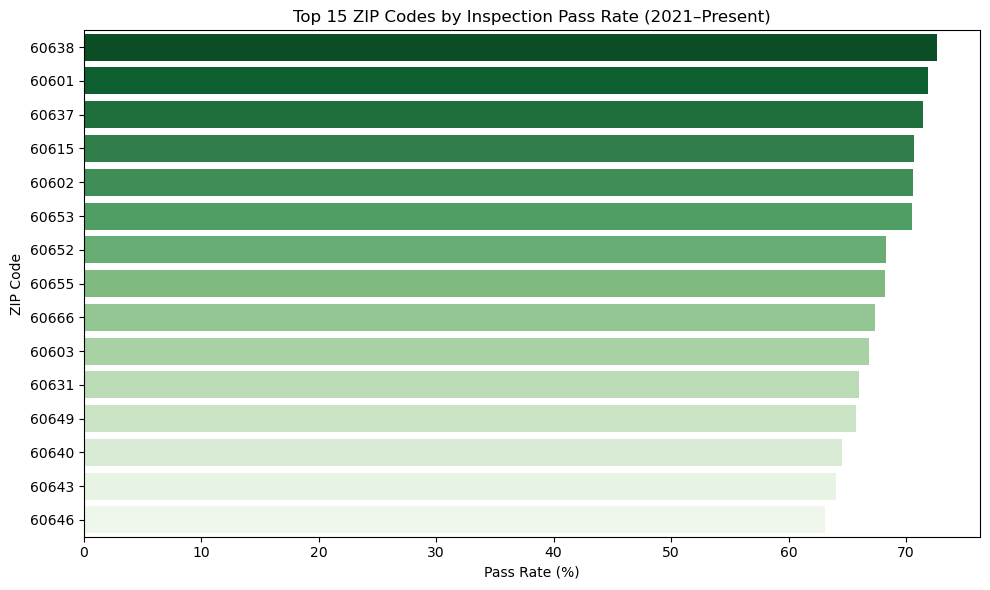

In [11]:
#Analyzing top 15 zip codes by pass rate
top_passing = zip_results_filtered.sort_values('pass_rate', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_passing.reset_index(),
    x='pass_rate',
    y='zip',
    hue='zip',
    palette='Greens_r',
    dodge=False,
    legend=False
)
plt.title('Top 15 ZIP Codes by Inspection Pass Rate (2021–Present)')
plt.xlabel('Pass Rate (%)')
plt.ylabel('ZIP Code')
plt.tight_layout()
plt.show()


In [12]:
!pip install folium
import folium
geojson_path = 'chicago_only_zips.geojson'

In [13]:
#Creating a map of chicago

#Centering the map
chicago_center = [41.8781, -87.6298] # Google gives me the coordinates in degrees, minutes and seconds = 41°52′04.80″ N, 87°39′54.00″ W
                                     # I converted to decimal degree format because that is what folium needs
                                     # Latitude conversion = 41 + (52/60) + (4.80/3600) = 41 + 0.8667 + 0.00133 = 41.8680
                                     # Longitude conversion = 87 + (39/60) + (54/3600) = 87 + 0.65 + 0.015 = 87.665
 
#Creating base
m = folium.Map(location = chicago_center,
               zoom_start = 10)

# Fail Rate layer
folium.Choropleth(
    geo_data = geojson_path,
    name = 'choropleth',
    data = zip_results_filtered.reset_index(),
    columns = ['zip', 'fail_rate'],
    key_on = 'feature.properties.ZCTA5CE10', # key inside GeoJSON for ZIP codes (Illinois ZIP GeoJSON uses ZCTA5CE10)
    fill_color='YlOrRd',                       # yellow-orange-red color scale
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Inspection Fail Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m) # Adds a mini map legend in the top-right corner.
                                # Allows me to turn layers on and off
m

In [14]:
!pip install geopandas
import geopandas as gpd

# Load the Illinois GeoJSON
gdf = gpd.read_file('il_illinois_zip_codes_geo.min.json')

# Only keep ZIPs in your data
chicago_zips = zip_results_filtered.index.astype(str)  # your DataFrame zip codes
gdf = gdf[gdf['ZCTA5CE10'].isin(chicago_zips)]

# Save the filtered GeoJSON
gdf.to_file('chicago_only_zips.geojson', driver='GeoJSON')


In [15]:
# Center map on Chicago
# Load the GeoJSON
gdf = gpd.read_file(geojson_path)

# Make sure zip code columns match
gdf['ZCTA5CE10'] = gdf['ZCTA5CE10'].astype(str)
zip_results_filtered.index = zip_results_filtered.index.astype(str)

# Merge fail_rate and pass_rate into the GeoDataFrame
gdf = gdf.merge(
    zip_results_filtered[['fail_rate', 'pass_rate']],
    left_on='ZCTA5CE10',
    right_index=True,
    how='left'
)


chicago_center = [41.8781, -87.6298]
m = folium.Map(location=chicago_center, zoom_start=10)

# Fail Rate layer
folium.Choropleth(
    geo_data=gdf,
    name='Fail Rate',
    data=zip_results_filtered.reset_index(),
    columns=['zip', 'fail_rate'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Inspection Fail Rate (%)'
).add_to(m)

# Pass Rate layer
folium.Choropleth(
    geo_data=gdf,
    name='Pass Rate',
    data=zip_results_filtered.reset_index(),
    columns=['zip', 'pass_rate'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Inspection Pass Rate (%)'
).add_to(m)

# This block of code allows me to hover over any shaded area to view the Zip Code
folium.GeoJson(
    gdf,
    name="ZIP Labels",
    tooltip=folium.GeoJsonTooltip(
        fields=['ZCTA5CE10', 'fail_rate', 'pass_rate'],
        aliases=['ZIP Code:', 'Fail Rate (%)', 'Pass Rate (%)'],
        localize = True,
        sticky = False
    )
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Show the map
m


### Are there any patterns in inspection results or violations by facility type?

In [17]:
#Creating a filtered group of inspections post 2020
df_recent = df[df['inspection_date'] >= '2021-01-01']
#Group
facility_results = df_recent[df_recent['results'].isin(['Pass', 'Fail', 'Pass w/ Conditions'])]\
    .groupby(['facility_type', 'results'])\
    .size()\
    .unstack(fill_value = 0)

# Add total inspections
facility_results['total'] = facility_results.sum(axis = 1)

#Filtering for 20+ inspections
facility_results_filtered = facility_results[facility_results['total'] >=20].copy()

#Calculating fail rate
facility_results_filtered['fail_rate'] = facility_results_filtered['Fail'] / facility_results_filtered['total'] * 100

#sort by highest fail rate
facility_results_filtered.sort_values(by = 'fail_rate', ascending = False).head(20)

results,Fail,Pass,Pass w/ Conditions,total,fail_rate
facility_type,,,,,
Unknown,32,51,11,94,34.042553
LIVE POULTRY,7,12,2,21,33.333333
SUPPORTIVE LIVING,7,10,4,21,33.333333
Liquor,78,119,45,242,32.231405
Shelter,10,19,3,32,31.250000
Wholesale,10,21,1,32,31.250000
GROCERY STORE/GAS STATION,7,9,7,23,30.434783
TAVERN,21,31,21,73,28.767123
Long Term Care,200,397,117,714,28.011204


# Note:
## Visualizing the top 20 facility types by inspection fail rates for inspections conducted after January 1, 2021. Only facility types with at least 20 inspections are included.


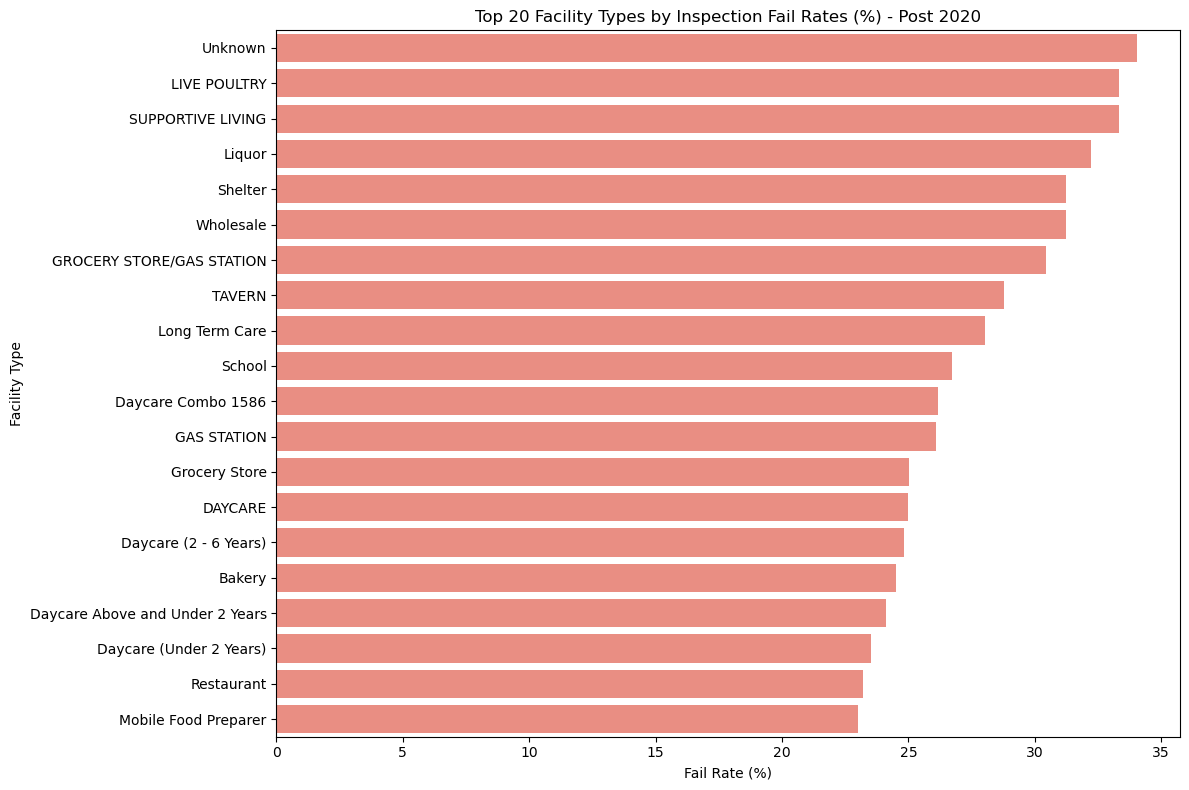

In [19]:
top20 = facility_results_filtered.sort_values('fail_rate', ascending=False).head(20).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top20,
    x='fail_rate',
    y='facility_type',
    color = 'salmon'  # Now used properly
)
plt.title('Top 20 Facility Types by Inspection Fail Rates (%) - Post 2020')
plt.xlabel('Fail Rate (%)')
plt.ylabel('Facility Type')
plt.tight_layout()
plt.show()

            

In [20]:
#Looking at the unknowns
unknown = df_recent[df_recent['facility_type'] == 'Unknown']

#Uncovering some facility names
unknown['dba_name'].value_counts().head(20)

dba_name
WHALE FISH & CHICKEN             9
SOULE' CHICAGO CORP              8
ORANGE LINE                      7
LUCKY STRIKE DOWNTOWN CHICAGO    7
TACOS VELAZQUEZ                  6
THE SLICE SHOP                   5
JOE & THE JUICE NEW YORK LLC     4
THE SECOND CITY                  4
DABBLE                           4
FOOD ROCKET                      4
HERBAN PRODUCE                   4
AVENUE GROCERY MART              3
BUYK                             3
66TH ST MARKET                   3
PROJECT APOLLO, LLC              3
OOOH WEE IT IS                   3
NEKTER JUICE BAR                 3
TEPALCATES RESTAURANT COMPANY    3
LOCAL MOTION                     3
GREAT DRAGON                     3
Name: count, dtype: int64

In [21]:
#Checking inspection results
unknown['results'].value_counts(normalize = True).mul(100).round(1)

results
Not Ready               34.0
Out of Business         31.2
Pass                    14.3
Fail                     9.0
No Entry                 7.6
Pass w/ Conditions       3.1
Business Not Located     0.8
Name: proportion, dtype: float64

## I decided to drop the unknown facility types because they are not active in most cases. They are dead records, unprepared inspections, or closed businesses. Keeping them would distort normal operating businesses.

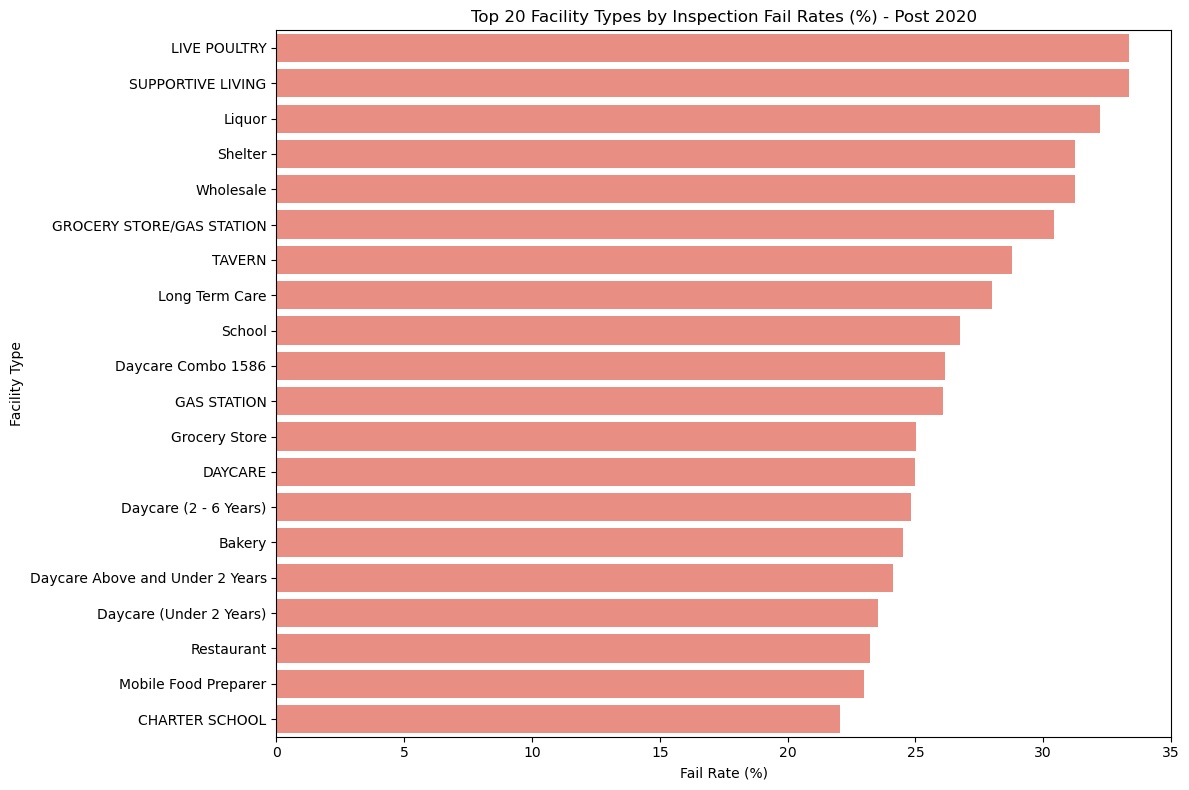

In [23]:
#Dropping unknonw facility types
facility_results_filtered = facility_results_filtered.drop('Unknown', errors='ignore')

top20 = facility_results_filtered.sort_values('fail_rate', ascending=False).head(20).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top20,
    x='fail_rate',
    y='facility_type',
    color = 'salmon'  # Now used properly
)
plt.title('Top 20 Facility Types by Inspection Fail Rates (%) - Post 2020')
plt.xlabel('Fail Rate (%)')
plt.ylabel('Facility Type')
plt.tight_layout()
plt.show()

## Facilities serving vulnerable groups such as senior care, shelters, daycares, and schools displayed higher inspection fail rates post the covid-19 pandemic. Traditional restaurants performed better, likley reflecting adaptions to stricter hygeine practices due to the covid-19 pandemic. Facilities handling live poultry exhibited the highest inspection fail rate among all groups, suggesting a need for increased oversight and stricter food safety protocols.

## **How did facilities adapt to the 2018 change in insepction definitions**?

In [26]:
# Remove blank or numeric-only facility_type values
df = df[~df['facility_type'].str.fullmatch(r'\d+', na=False)]


In [27]:
# Splitting the data
pre_2018 = df[df['inspection_date'] < '2018-07-01']
post_2018 = df[df['inspection_date'] > '2018-07-01']

In [28]:
# Grouping pre-2018 inspections
pre_grouped = pre_2018[pre_2018['results'].isin(['Pass', 'Fail', 'Pass w/ Conditions'])]\
    .groupby(['facility_type', 'results'])\
    .size()\
    .unstack(fill_value=0)

# Grouping post-2018 inspections
post_grouped = post_2018[post_2018['results'].isin(['Pass', 'Fail', 'Pass w/ Conditions'])]\
    .groupby(['facility_type', 'results'])\
    .size()\
    .unstack(fill_value=0)

# Notes:
# .size() counts number of inspections in each group
# .unstack(fill_value=0) pivots it into a table (facility type rows, result columns)


In [29]:
pre_grouped.head()


results,Fail,Pass,Pass w/ Conditions
facility_type,,,
(convenience store),0,1,0
(gas station),1,1,0
1005 NURSING HOME,1,1,0
1023 CHILDERN'S SERVICE S FACILITY,2,4,0
1023 CHILDERN'S SERVICES FACILITY,3,21,0


In [30]:
post_grouped.head()

results,Fail,Pass,Pass w/ Conditions
facility_type,,,
(REHAB CENTER),0,1,0
1023 CHILDERN'S SERVICES FACILITY,4,4,6
1023 CHILDREN'S SERVICES FACILITY,0,1,1
1023-CHILDREN'S SERVICES FACILITY,1,5,1
1475 LIQUOR,1,1,0


In [31]:
#Calculating failure rates
pre_grouped['total'] = pre_grouped.sum(axis=1)
pre_grouped['fail_rate'] = pre_grouped['Fail']/pre_grouped['total']*100

In [32]:
post_grouped['total'] = post_grouped.sum(axis=1)
post_grouped['fail_rate'] = post_grouped['Fail']/post_grouped['total']*100

In [33]:
pre_grouped.sort_values('total', ascending = False)

results,Fail,Pass,Pass w/ Conditions,total,fail_rate
facility_type,,,,,
Restaurant,21490,67628,12841,101959,21.077100
Grocery Store,5401,12908,1935,20244,26.679510
School,2110,7833,585,10528,20.041793
Children's Services Facility,465,1932,129,2526,18.408551
Bakery,530,1526,173,2229,23.777479
...,...,...,...,...,...
MOBILE FROZEN DESSERTS DISPENSER-NON-MOTOR,0,1,0,1,0.000000
Mobile Frozen Dessert Disp/Non-motorized,1,0,0,1,100.000000
Mobile frozen dessert vendor,0,0,1,1,0.000000


In [34]:
post_grouped.sort_values('total', ascending = False)

results,Fail,Pass,Pass w/ Conditions,total,fail_rate
facility_type,,,,,
Restaurant,15182,31919,19872,66973,22.668837
Grocery Store,2705,4597,3214,10516,25.722708
School,1875,4329,1082,7286,25.734285
Children's Services Facility,676,2347,701,3724,18.152524
Daycare Above and Under 2 Years,387,986,321,1694,22.845336
...,...,...,...,...,...
DRUG STORE/GROCERY,0,1,0,1,0.000000
DOLLAR TREE,0,0,1,1,0.000000
TEST KITCHEN/ STORAGE,0,1,0,1,0.000000


In [35]:
# Step 1: Filter to facility types with at least 20 inspections in both timeframes
filtered_split = pre_grouped[pre_grouped['total'] >= 20].index.intersection(
    post_grouped[post_grouped['total'] >= 20].index
)

pre_filtered = pre_grouped.loc[filtered_split].copy()
post_filtered = post_grouped.loc[filtered_split].copy()

# Step 2: Calculate fail rate for pre-2018 and post-2018
pre_filtered['fail_rate'] = pre_filtered['Fail'] / pre_filtered['total'] * 100
post_filtered['fail_rate'] = post_filtered['Fail'] / post_filtered['total'] * 100

# Step 3: Combine into a new DataFrame
fail_rate_change_df = pd.DataFrame({
    'pre_fail_rate': pre_filtered['fail_rate'],
    'post_fail_rate': post_filtered['fail_rate']
})

# Step 4: Calculate the change
fail_rate_change_df['fail_rate_change'] = (
    fail_rate_change_df['post_fail_rate'] - fail_rate_change_df['pre_fail_rate']
)

# Step 5: Sort and reset index
fail_rate_change_df = fail_rate_change_df.sort_values('fail_rate_change', ascending=False).reset_index()

# Step 6: Display top 15 increases
fail_rate_change_df.head(15)


,facility_type,pre_fail_rate,post_fail_rate,fail_rate_change
0,Shelter,11.627907,26.530612,14.902705
1,DAYCARE,7.500000,21.739130,14.239130
2,LIVE POULTRY,27.450980,36.170213,8.719232
3,School,20.041793,25.734285,5.692492
4,Long Term Care,22.232916,27.507163,5.274247
5,Daycare Above and Under 2 Years,18.809777,22.845336,4.035560
6,Bakery,23.777479,26.346434,2.568955
7,Shared Kitchen User (Long Term),2.688172,4.784689,2.096517
8,Hospital,15.186916,16.908213,1.721297
9,Restaurant,21.077100,22.668837,1.591737


In [36]:
#Combining pre and post 2018 fail rates into a dataframe 
fail_rate_change_df = pd.DataFrame({
    'pre_fail_rate':pre_filtered['fail_rate'],
    'post_fail_rate':post_filtered['fail_rate']
})
fail_rate_change_df['fail_rate_change'] = fail_rate_change_df['post_fail_rate'] - fail_rate_change_df['pre_fail_rate']
fail_rate_change_df = fail_rate_change_df.sort_values('fail_rate_change', ascending = False).reset_index()
                                   

In [37]:
fail_rate_change_df.sort_values('fail_rate_change').head(15)

,facility_type,pre_fail_rate,post_fail_rate,fail_rate_change
32,Unknown,60.069444,31.451613,-28.617832
31,Mobile Prepared Food Vendor,31.481481,14.516129,-16.965352
30,Mobile Food Dispenser,32.313830,18.018018,-14.295812
29,ROOFTOP,13.888889,0.000000,-13.888889
28,Mobile Frozen Desserts Vendor,13.333333,0.000000,-13.333333
27,Mobile Food Preparer,33.702882,24.007937,-9.694946
26,Wholesale,37.130802,28.571429,-8.559373
25,Liquor,40.540541,33.248082,-7.292459
24,TAVERN,40.000000,33.082707,-6.917293
23,CHARTER SCHOOL,32.352941,26.315789,-6.037152


In [38]:
fail_rate_change_df.sort_values('fail_rate_change', ascending = False).head(15)

,facility_type,pre_fail_rate,post_fail_rate,fail_rate_change
0,Shelter,11.627907,26.530612,14.902705
1,DAYCARE,7.500000,21.739130,14.239130
2,LIVE POULTRY,27.450980,36.170213,8.719232
3,School,20.041793,25.734285,5.692492
4,Long Term Care,22.232916,27.507163,5.274247
5,Daycare Above and Under 2 Years,18.809777,22.845336,4.035560
6,Bakery,23.777479,26.346434,2.568955
7,Shared Kitchen User (Long Term),2.688172,4.784689,2.096517
8,Hospital,15.186916,16.908213,1.721297
9,Restaurant,21.077100,22.668837,1.591737


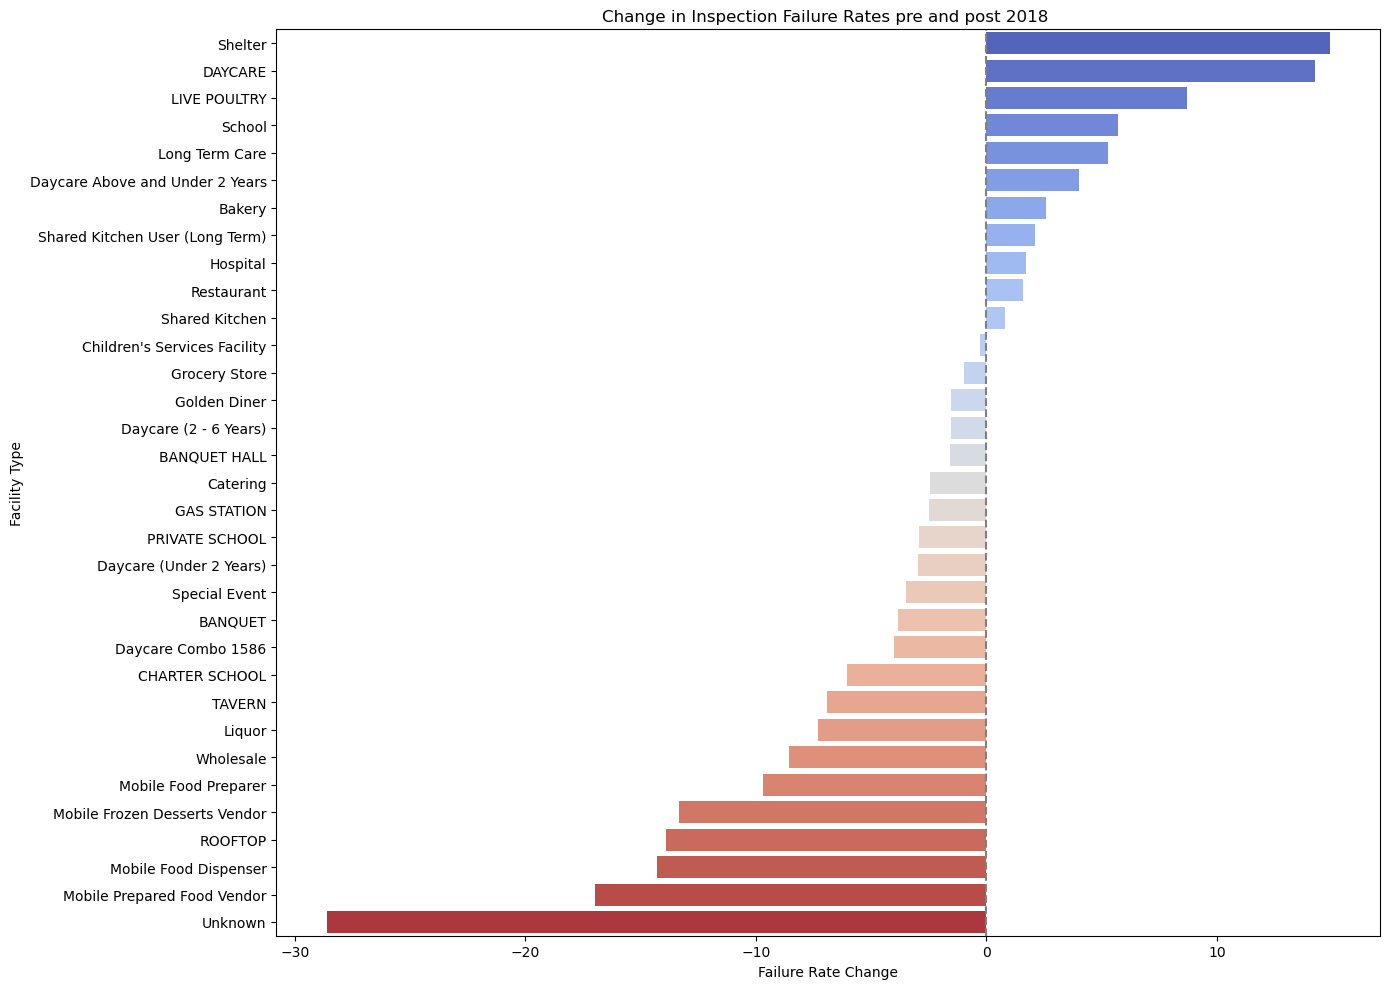

In [39]:
plt.figure(figsize = (14,10))
sns.barplot(data = fail_rate_change_df,
            x = 'fail_rate_change',
            y = 'facility_type',
            hue = 'facility_type',
            palette = 'coolwarm',
            dodge = False,
            legend = False
           )
plt.axvline(0, color = 'grey', linestyle = '--')
plt.title('Change in Inspection Failure Rates pre and post 2018 ')
plt.xlabel('Failure Rate Change')
plt.ylabel('Facility Type')
plt.tight_layout()

In [40]:
df_unknown = df[(df['facility_type'] == 'Unknown') & (df['inspection_date'] >= '2018-07-01')]
df_unknown['dba_name'].value_counts().head(15)


dba_name
WHALE FISH & CHICKEN             9
SOULE' CHICAGO CORP              8
LUCKY STRIKE DOWNTOWN CHICAGO    7
ORANGE LINE                      7
THE SECOND CITY                  6
MAN-O-SALWA                      6
TACOS VELAZQUEZ                  6
BOTY'S ICE CREAM ROLL INC..      5
TOKYO LUNCH BOXES & CATERING     5
BELEN                            5
THE SLICE SHOP                   5
JOE & THE JUICE NEW YORK LLC     4
FOOD ROCKET                      4
HERBAN PRODUCE                   4
DABBLE                           4
Name: count, dtype: int64

# Are complaint based inspections more likely to result in failing inspection?

In [42]:
# Isolating inspection types that include complaints 
complaints = df[df['inspection_type'].str.contains('Complaint', case=False, na=False)].copy()


In [43]:
# Complaint vs non complaint fail rates

#Creating new column
df['is_complaint'] = df['inspection_type'].str.contains('Complaint', case = False, na = False)

#Filtering to core results
filtered = df[df['results'].isin(['Pass', 'Fail', 'Pass w/ Conditions'])]

#Grouping is_complaint and results
complaint_results = filtered.groupby(['is_complaint', 'results']).size().unstack(fill_value=0)

#calculate fail rates
complaint_results['total'] = complaint_results.sum(axis=1)
complaint_results['fail_rate'] = complaint_results['Fail'] / complaint_results['total'] * 100

In [44]:
complaints

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,has_violations
0,1170324,CAPTAIN HOOKS FISH & CHICKEN/FIREHOUSE GRILL,CAPTAIN HOOKS FISH & CHICKEN FIREHOUSE GRILL,1804138,Restaurant,Risk 1 (High),5648 W ROOSEVELT,CHICAGO,IL,60644,2012-06-18,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.865679,-87.766331,"(41.86567851033532, -87.76633113301574)",True
6,2608378,Babas Halal,Babas Halal,2684170,Restaurant,Risk 1 (High),7901 S DAMEN AVE,CHICAGO,IL,60620,2024-12-03,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.750189,-87.672986,"(41.750189342293375, -87.67298583977204)",True
45,2611362,KING'S CHOP SUEY,KING'S CHOP SUEY,2055457,Restaurant,Risk 1 (High),4635 W 63RD ST,CHICAGO,IL,60629,2025-01-29,Complaint,Pass,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...,41.778359,-87.738760,"(41.77835933880419, -87.73875954521854)",True
46,2611492,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,2771508,Restaurant,Risk 2 (Medium),855 W 87TH ST,CHICAGO,IL,60620,2025-01-30,Complaint Re-Inspection,Pass,NaN,41.735932,-87.645805,"(41.735932372267435, -87.64580479022729)",False
50,2610952,LA LUNA,LA LUNA,2601590,Restaurant,Risk 1 (High),1726 S RACINE AVE,CHICAGO,IL,60608,2025-01-23,Complaint,Fail,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",41.857996,-87.656578,"(41.8579956978484, -87.65657779871901)",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290021,2610849,3LP,3LP,2956223,Restaurant,Risk 1 (High),964 W 31ST ST,CHICAGO,IL,60608,2025-01-22,Complaint Re-Inspection,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.838089,-87.651295,"(41.83808910384431, -87.65129460738949)",True
290027,2610827,Popeye's #812,Popeye's,2555774,Restaurant,Risk 1 (High),2355 W ADDISON ST,CHICAGO,IL,60618,2025-01-22,Complaint,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.946623,-87.688027,"(41.946623228221306, -87.68802683245612)",True
290035,2610896,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2084793,Restaurant,Risk 1 (High),3227 W ADDISON ST,CHICAGO,IL,60618,2025-01-23,Complaint,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...,41.946511,-87.708969,"(41.94651094106423, -87.70896897170057)",True
290041,2610859,MOY LEE,MOY LEE,2877054,Restaurant,Risk 1 (High),5346 N MILWAUKEE AVE,CHICAGO,IL,60630,2025-01-22,Complaint,Pass,NaN,41.977764,-87.769830,"(41.97776393135019, -87.76982985082259)",False


In [45]:
complaint_results

results,Fail,Pass,Pass w/ Conditions,total,fail_rate
is_complaint,,,,,
False,44732,124205,34831,203768,21.952416
True,11540,25450,8850,45840,25.174520


### Running a Chi-Square Test of Independence to test if failure rates are significantly associated with where an inspection was triggered by a complaint

In [47]:
from scipy.stats import chi2_contingency

- chi2_contingency(contingency) is a function that performs the test.
    - Is the failure rate independent of whether the inspection was triggered by a complaint?


- chi2 is the chi-square test statistic
    - It measures how much the observed values deviate from the values you'd expect if there were no association (if complaint inspections failed at the same rate as non-complaint ones).
    - higher values = greater evidence of relationship


- p-value tells me the probability that I would see a chi-squared statistic this extreme by random chance if complaint status and inspection result were truly unrelated.
    - p <0.05 = strong evidence of a relationship
    - p >= 0.05 = not enought evidence to conclude a relationship


- dof(degrees of freedom) For a 2×2 table, it's always (rows−1) × (columns−1) = 1.

- expected : shows the expected values in each cell of your table if the variables were independent.
It helps assess how far off your actual counts are from "no association."


### Null Hypothesis: There is no association between complaint based inspections and inspection outcomes. The likelihood of failing an expection is the same whether or not the inspection was triggered by a complaint.

### Alternative Hypothesis: There is an association between complaint based inspections and outcomes. The likelihood of failing an inspection is increased when driven by a complaint. 

In [49]:
#Fail vs non fail by complaint status
contingency = pd.DataFrame({
    'Fail':complaint_results['Fail'],
    'Non_Fail':complaint_results['Pass'] + complaint_results['Pass w/ Conditions']
})
contingency

,Fail,Non_Fail
is_complaint,,
False,44732,159036
True,11540,34300


In [50]:
#Running Test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")


Chi-Square Statistic: 222.31
P-value: 0.0000


### The difference in failure rates between complaint driven (25.2%) and non complaint driven inspections (22%) is statistically significant and highly unlikely to be due to random chance. 
    - This test does not require equal sample sizes. It evaluates if the proportion of fails differs across groups, adjusting for the size difference
    - Despite the sample size difference, the Chi-Square test adjusts for that by calculating the expected frequencies under the assumption of independence.

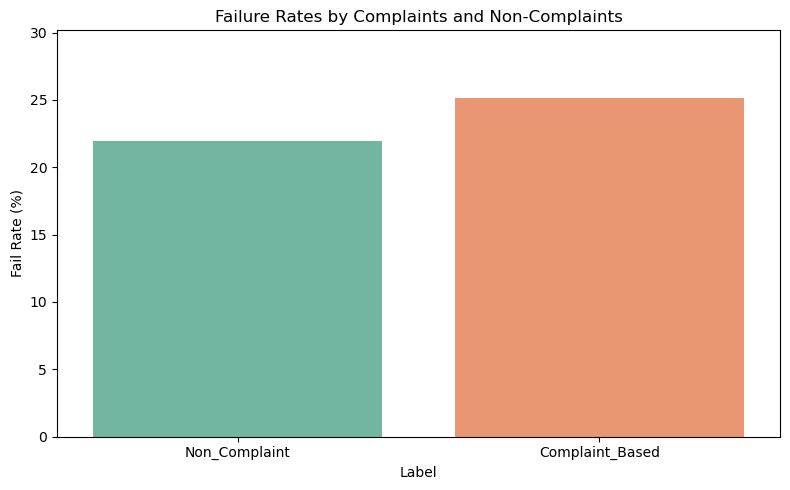

In [52]:
#Prep data for plotting
plot_df = complaint_results[['fail_rate']].reset_index()
plot_df['label'] = plot_df['is_complaint'].map({True:'Complaint_Based', False:'Non_Complaint'})

plt.figure(figsize=(8,5))
sns.barplot(data = plot_df,
            x = 'label',
            y = 'fail_rate',
            hue = 'label',
            palette = 'Set2'
           )
plt.title('Failure Rates by Complaints and Non-Complaints')
plt.xlabel('Label')
plt.ylabel('Fail Rate (%)')
plt.ylim(0, plot_df['fail_rate'].max() + 5) #Gives head room above the tallest bar
plt.tight_layout()

# Do specific business chains have higher fail rates?

In [54]:
# Grouping business names and results 
chain_results = filtered.groupby(['dba_name', 'results']).size().unstack(fill_value = 0)


In [55]:
# Calculating totals and fail rates 
chain_results['total'] = chain_results.sum(axis = 1)
chain_results['fail_rate'] = chain_results['Fail']/chain_results['total'] * 100
chain_results

results,Fail,Pass,Pass w/ Conditions,total,fail_rate
dba_name,,,,,
"""GENGHIS"" EATERY",1,1,0,2,50.000000
"""M"" BAR",0,1,0,1,0.000000
"""SWEET SUGAH"" CATERING BOUTIQUE",0,1,0,1,0.000000
"#1 CHINA EXPRESS, LTD.",0,1,0,1,0.000000
#1 CHOP SUEY,11,25,4,40,27.500000
...,...,...,...,...,...
ropa restaurant & wine bar,0,1,0,1,0.000000
stockton,3,4,0,7,42.857143
subway restaurant 1,0,2,1,3,0.000000


In [56]:
#Filtering to only include business names with 20+ inspections
chain_results_20plus = chain_results[chain_results['total'] >=20]
chain_results_20plus = chain_results_20plus.sort_values('fail_rate', ascending = False)
chain_results_20plus.head(50)

results,Fail,Pass,Pass w/ Conditions,total,fail_rate
dba_name,,,,,
CHICAGO CTR COLLEGIATE,13,7,0,20,65.000000
GRANNY'S DAYCARE CENTER,19,10,3,32,59.375000
LA MIXTECA POBLANA 2 LLC,16,10,1,27,59.259259
FLAMING WOK & GRILL,14,6,4,24,58.333333
"SU NUEVA CASA DEL GALLO BRAVO, INC.",15,6,6,27,55.555556
HOE TOY CHOP SUEY,15,8,4,27,55.555556
TACONAZO EL ORIGINAL #1,12,8,2,22,54.545455
ROMA'S RESTAURANT,15,11,2,28,53.571429
DOG HAUS,14,8,5,27,51.851852
